## Final Project Submission ##
* Student name: Alejandro Harrison
* Student pace: self paced
* Scheduled project review date/time: November 30, 2022
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://dev.to/crazyjandro/halfway-there-3563

# Heart Disease Classification

## Business Goal

We'll be working with the largest hospital in Massachusetts (The Massachusetts General Hospital). Using three different classification algorithms, we'll determine which algorithm provides the most accurate predictions for whether a patient is at risk in 10 years for coronary heart disease (CHD). This will in turn help the hospital create a treatment/preventative plan for at-risk patients early on, and hopefully prevent CHD from developing.    

## Data

The Framingham Heart Study (https://www.framinghamheartstudy.org/fhs-about/) is a long term, ongoing study on cardiovascular diseases. Started in 1948, the study looked at numerous factors such as age, gender, cholesterol levels, etc, and would eventually lead to the identification of several cardiovascular disease risk factors. We'll be using a Kaggle dataset with data from this study, which contains multiple risk factors for a type of cardiovascular disease called coronary heart disease (CHD). The dataset also contains a target variable for whether a patient is at risk in 10 years for CHD. The variables are divided into demographic, behavioral and medical categories and can be found in the README file.

### Preprocessing Our Data ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Let's look at our data
df = pd.read_csv("Framingham.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


In [2]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Let's convert BPMeds from a float to an int
df["BPMeds"] = df["BPMeds"].astype("int64")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   int64  
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 516.8 KB


In [5]:
##Let's check for null values

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
#Let's check for duplicates
df.drop_duplicates(inplace = True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [7]:
df["age"].value_counts(ascending = False)

40    188
46    180
42    176
41    171
39    168
48    167
44    162
45    158
43    157
52    146
51    141
38    139
55    138
53    137
50    135
47    135
54    132
49    130
57    118
56    118
59    117
58    117
60    109
63    107
61    105
62     98
37     89
64     88
36     83
65     54
67     43
35     41
66     38
68     18
34     16
69      6
33      5
70      2
32      1
Name: age, dtype: int64

### Splitting The Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Our target variable is TenYearCHD
X = df.drop("TenYearCHD", axis = 1)
y = df["TenYearCHD"]


#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

#Train-Test Split copy
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, stratify = y, random_state = 1)

#Let's scale our data
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

SS2 = StandardScaler()
X_train2 = SS2.fit_transform(X_train2)
X_test2 = SS2.transform(X_test2)

In [9]:
#Let's take a look at our value counts for our target "TenYearCHD"
df["TenYearCHD"].value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

**It looks like our data is imbalanced, so let's use SMOTE to resample.**

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

## The Algorithms

Using three different classification algorithms, we'll look at how well our models can predict whether a patient is at risk (in  10 years) for CVD. We'll use logistic regression, then use a Decision Tree algorithm, then finally build upon our Decision Tree with a Random Forest algorithm. After running our base models, we'll attempt to improve upon our Decision Tree and Random Forest algorithms.

### Logistic Regression

In [11]:
#Let's build a logistic regression model
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(solver = "saga", random_state = 1)

#Fit our model and predict
baseline_model.fit(X_train, y_train)
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2628
           1       0.67      0.68      0.68      2628

    accuracy                           0.68      5256
   macro avg       0.68      0.68      0.68      5256
weighted avg       0.68      0.68      0.68      5256



In [13]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       877
           1       0.28      0.71      0.40       157

    accuracy                           0.68      1034
   macro avg       0.60      0.69      0.59      1034
weighted avg       0.83      0.68      0.72      1034



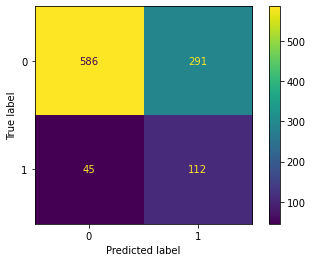

In [14]:
#Let's create a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(baseline_model, X_test, y_test);

**We can see that our model is slightly overfitting, but let's take a look at our classification summary results.**

For our test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .28, a recall score of .71, and an f1 score of .40. This means that:

* Out of all the patients that the model predicted would be at risk for CHD, 28% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 71% of them
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD.

**We can also see the true negative, false negative, false positive and true positive values for our test model (from our confusion matrix), where:**

* 586 patients were correctly predicted as not being at risk for CHD
* 45 patients were wrongly predicted as not being at risk for CHD
* 291 patients were wrongly predicted as being at risk for CHD
* 112 patients were correctly predicted as being at risk for CHD

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy", random_state= 1)

#Fit our model and predict
dtc.fit(X_train, y_train)
dtc_train_pred = dtc.predict(X_train)
dtc_test_pred = dtc.predict(X_test)


In [16]:
print(classification_report(y_train, dtc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00      2628

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256



In [17]:
print(classification_report(y_test, dtc_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       877
           1       0.23      0.36      0.28       157

    accuracy                           0.72      1034
   macro avg       0.55      0.57      0.55      1034
weighted avg       0.78      0.72      0.74      1034



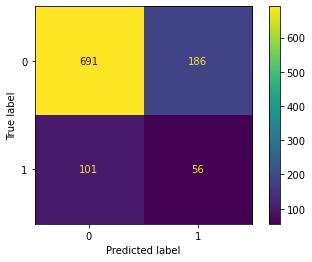

In [18]:
plot_confusion_matrix(dtc, X_test, y_test);

**This time our model is greatly overfitting. Let's take a look at our classification report results**

For our test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .23, a recall score of .36, and an f1 score of .28, meaning: 

* Out of all the patients that the model predicted would be at risk for CHD, 23% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 36% of them
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD.


**Looking at our test model confusion matrix we can see that:**
* 691 patients were correctly predicted as not being at risk for CHD
* 101 patients were wrongly predicted as not being at risk for CHD
* 186 patients were wrongly predicted as being at risk for CHD
* 56 patients were correctly predicted as being at risk for CHD

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)


In [20]:
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00      2628

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256



In [21]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       877
           1       0.33      0.27      0.30       157

    accuracy                           0.81      1034
   macro avg       0.60      0.59      0.59      1034
weighted avg       0.79      0.81      0.80      1034



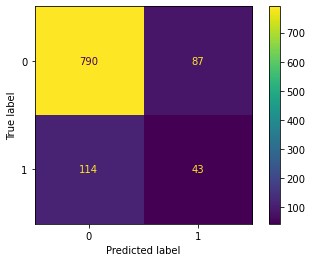

In [22]:
plot_confusion_matrix(rf, X_test, y_test);

**Again, our model is greatly overfitting. Let's take a look at our classification report results**

For our test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .33, a recall score of .27, and an f1 score of .30, meaning:

* Out of all the patients that the model predicted would be at risk for CHD, 33% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 27% of them
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD.


**For our last model's confusion matrix we can see that:**
* 790 patients were correctly predicted as not being at risk for CHD
* 114 patients were wrongly predicted as not being at risk for CHD
* 87 patients were wrongly predicted as being at risk for CHD
* 43 patients were correctly predicted as being at risk for CHD

## Improving The Models

### 1) Decision Tree

We'll see how manipulating the **max_depth**, **min_samples_split**, and **min_samples_leaf** hyperparameters in our decision tree model will affect our evaluation metrics.



### max_depth ###

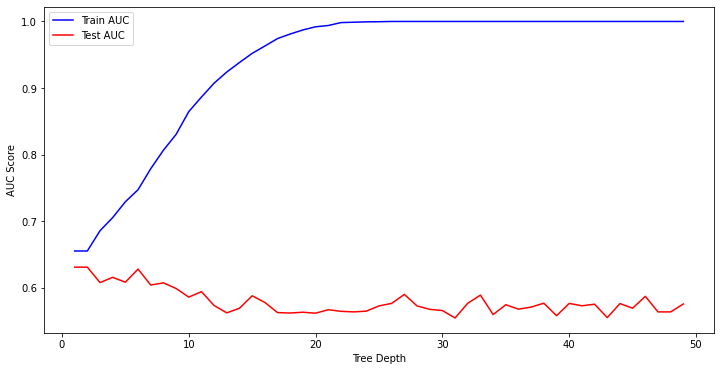

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Let's plot our AUC Graph

max_depths = list(range(1,50))
train_results = []
test_results = []

for depth in max_depths:
    dtc2 = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize = (12,6))
plt.plot(max_depths,train_results, "b", label = "Train AUC");
plt.plot(max_depths, test_results, "r", label = "Test AUC");
plt.ylabel("AUC Score");
plt.xlabel("Tree Depth");
plt.legend();

### min_samples_split ###

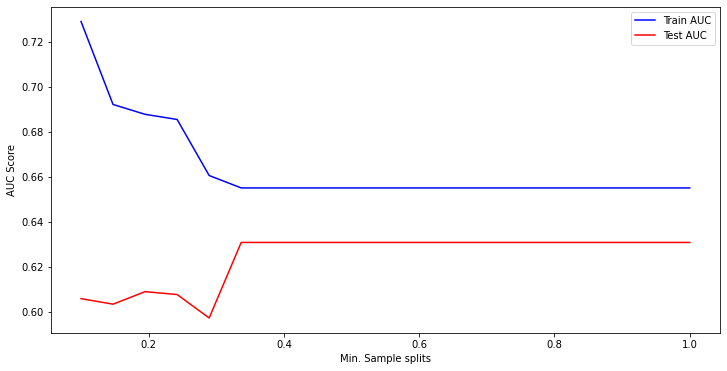

In [24]:
import numpy as np
min_samples_splits = np.linspace(0.1, 1.0, 20)
train_results = []
test_results = []
for min_samples in min_samples_splits:
    dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6));
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC');
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC');
plt.xlabel('Min. Sample splits');
plt.ylabel("AUC Score")
plt.legend();

### min_samples_leaf ###

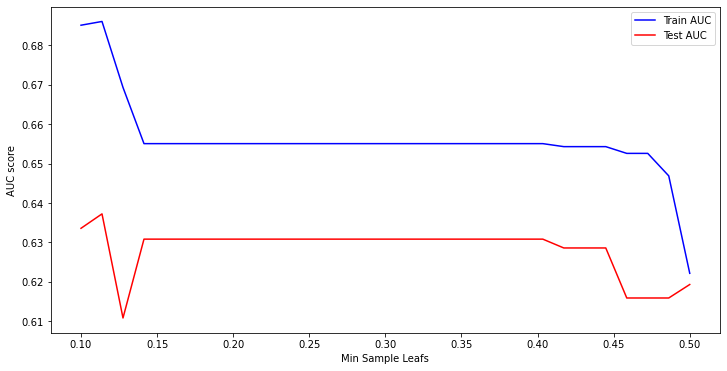

In [25]:
min_samples_leafs = np.linspace(0.1, .5, 30)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min Sample Leafs')
plt.legend()
plt.show()

**From our AUC graphs, we can see that:**
* Our optimized max_depth value is between 1 and 5. Any higher, and the model starts overfitting due to the training model performing better than our test model
* Our optimized min_sample_split value is between 0.2 and 0.4. Any higher and performance for both models does not change
* Our optimized min_samples_leaf value is between 0.1 and 0.13. Any higher and performance decreases before plateauing

**So let's create a grid search with these value ranges, and find an optimized model**

In [26]:
from sklearn.model_selection import GridSearchCV

dtc3 = DecisionTreeClassifier()

#Our Grid Search
param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
    'min_samples_leaf': [0.1, 0.12, 0.13]
}


gs_tree = GridSearchCV(dtc3, param_grid)
gs_tree.fit(X_train, y_train)
gs_tree.best_params_


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2,
 'random_state': 1}

In [27]:
#Training Results
gs_tree_train_pred = gs_tree.predict(X_train)
print(classification_report(y_train, gs_tree_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      2628
           1       0.66      0.78      0.71      2628

    accuracy                           0.69      5256
   macro avg       0.69      0.69      0.68      5256
weighted avg       0.69      0.69      0.68      5256



In [28]:
#Test Results
gs_tree_test_pred = gs_tree.predict(X_test)
print(classification_report(y_test, gs_tree_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71       877
           1       0.23      0.69      0.34       157

    accuracy                           0.60      1034
   macro avg       0.57      0.63      0.52      1034
weighted avg       0.81      0.60      0.65      1034



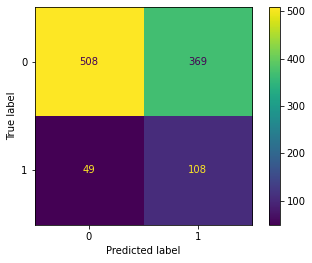

In [29]:
#Test Confusion Matrix
dt_model = gs_tree.best_estimator_
plot_confusion_matrix(dt_model, X_test, y_test);

**We can see our model has less overfitting. Let's take a look at our classification report results**

For our test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .23, a recall score of .69, and an f1 score of .34, meaning: 

* Out of all the patients that the model predicted would be at risk for CHD, 23% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 69% of them, which is a 33% improvement from the base model
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD, but has improved by 6% since the initial model.


**Looking at our test model confusion matrix we can see that:**
* 508 patients were correctly predicted as not being at risk for CHD
* 49 patients were wrongly predicted as not being at risk for CHD
* 369 patients were wrongly predicted as being at risk for CHD
* 108 patients were correctly predicted as being at risk for CHD

### 2) Random Forest

We'll see how manipulating **n_estimators, **max_depth, min_samples_split, and min_samples_leaf** hyperparameters in a grid search for our decision tree model will affect our evaluation metrics.

In [30]:
#Let's do another grid search, this time for our Random Forest model.

rf2 = RandomForestClassifier()

#Grid Search
rand_for_grid = {
    'n_estimators': [25, 50, 75, 100],
    
    'random_state': [1],
    
    'max_depth': [5, 7, 10],
    
    'min_samples_split': [10, 20, 30],
    
    'min_samples_leaf': [0.2, .30, .50]
    
    
}

gs_forest = GridSearchCV(rf2, rand_for_grid)

gs_forest.fit(X_train, y_train)

gs_forest.best_params_

{'max_depth': 5,
 'min_samples_leaf': 0.2,
 'min_samples_split': 10,
 'n_estimators': 50,
 'random_state': 1}

In [31]:
#Training Results
gs_forest_train_pred = gs_forest.predict(X_train)
print(classification_report(y_train, gs_forest_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      2628
           1       0.66      0.71      0.69      2628

    accuracy                           0.67      5256
   macro avg       0.68      0.67      0.67      5256
weighted avg       0.68      0.67      0.67      5256



In [32]:
#Test Results
gs_forest_test_pred = gs_forest.predict(X_test)
print(classification_report(y_test, gs_forest_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.74       877
           1       0.24      0.68      0.36       157

    accuracy                           0.63      1034
   macro avg       0.58      0.65      0.55      1034
weighted avg       0.81      0.63      0.69      1034



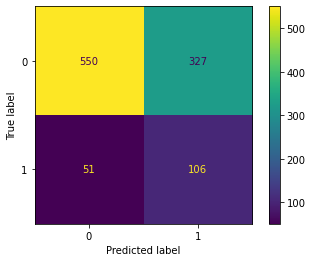

In [33]:
#Test Confusion Matrix
rf_model = gs_forest.best_estimator_
plot_confusion_matrix(rf_model, X_test, y_test);

#### Let's try tuning the hyperparameters once more ####

In [34]:
rf3 = RandomForestClassifier()


#Grid Search
rand_for_grid = {
    'n_estimators': [20, 30, 40, 50],
    
     'random_state': [1],
    
    'max_depth': [3, 5, 7],
    
    'min_samples_split': [3, 5, 10],
    
    'min_samples_leaf': [0.1, .20, .30]
}

gs_forest_tune = GridSearchCV(rf3, rand_for_grid)
gs_forest_tune.fit(X_train, y_train)

gs_forest_tune.best_params_


{'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 3,
 'n_estimators': 50,
 'random_state': 1}

In [35]:
#Training Results
gs_forest_train_pred2 = gs_forest_tune.predict(X_train)
print(classification_report(y_train, gs_forest_train_pred2))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68      2628
           1       0.68      0.71      0.69      2628

    accuracy                           0.69      5256
   macro avg       0.69      0.69      0.69      5256
weighted avg       0.69      0.69      0.69      5256



In [36]:
#Test Results
gs_forest_tune_pred = gs_forest_tune.predict(X_test )
print(classification_report(y_test, gs_forest_tune_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.76       877
           1       0.26      0.67      0.37       157

    accuracy                           0.66      1034
   macro avg       0.59      0.66      0.57      1034
weighted avg       0.82      0.66      0.71      1034



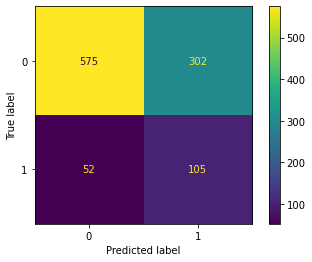

In [37]:
#Test Confusion Model
rf_model = gs_forest_tune.best_estimator_
plot_confusion_matrix(rf_model, X_test, y_test);

**There is a decrease in overfitting, so let's see if there's an improvement in our results**

For our better test model class 1 (meaning the patient is at risk for coronary heart disease) we have a precision score of .26, a recall score of .67, and an f1 score of .37, meaning: 

* Out of all the patients that the model predicted would be at risk for CHD, 26% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 67% of them, which is a 40% improvement from from our base model
* Our model has a low f1 score, indicating poor performance on predicting risk of CHD, but has improved by 7% from the initial model.


**Looking at our test model confusion matrix we can see that:**
* 575 patients were correctly predicted as not being at risk for CHD
* 52 patients were wrongly predicted as not being at risk for CHD
* 302 patients were wrongly predicted as being at risk for CHD
* 105 patients were correctly predicted as being at risk for CHD

**Finally we can look at feature importance of our model, and see which features are most indicitative of whether someone is at risk for CHD or not**

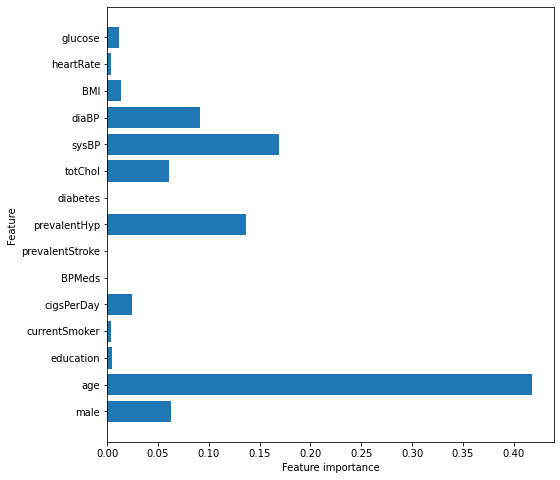

In [38]:

def plot_feature_importances(model):    
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf_model)

## Random Forest Without Smote ##
Before we look at our final results, let's look to see what happens to our random forest model if we don't use smote

In [39]:
rf4 = RandomForestClassifier()


rand_for_grid = {
    'n_estimators': [20, 30, 40, 50],
    
     'random_state': [1],
    
    'max_depth': [3, 5, 7],
    
    'min_samples_split': [3, 5, 10],
    
    'min_samples_leaf': [0.1, .20, .30]
}

gs_forest_tune2 = GridSearchCV(rf4, rand_for_grid)

#
gs_forest_tune2.fit(X_train2, y_train2)

gs_forest_tune2.best_params_

{'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 3,
 'n_estimators': 20,
 'random_state': 1}

In [40]:
gs_forest_train_pred3 = gs_forest_tune2.predict(X_train2)
print(classification_report(y_train2, gs_forest_train_pred3))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2628
           1       0.00      0.00      0.00       471

    accuracy                           0.85      3099
   macro avg       0.42      0.50      0.46      3099
weighted avg       0.72      0.85      0.78      3099



C:\Users\Alejandro\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
gs_forest_tune_pred2 = gs_forest_tune2.predict(X_test2)
print(classification_report(y_test2, gs_forest_tune_pred2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       877
           1       0.00      0.00      0.00       157

    accuracy                           0.85      1034
   macro avg       0.42      0.50      0.46      1034
weighted avg       0.72      0.85      0.78      1034



C:\Users\Alejandro\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


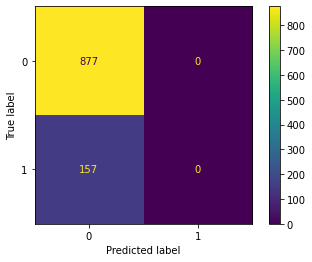

In [42]:
rf_model2 = gs_forest_tune2.best_estimator_
plot_confusion_matrix(rf_model2, X_test2, y_test2);

## Final Results ##

Although both the Decision Tree and Random Forest models peformed similarly, the final choice is to use a Random Forest model. Decision Trees lack randomness due to their use of a greedy algorithm, but Random Forests address this lack of randomness by using subspace sampling and by using multiple decision trees. The use of multiple decision trees also allows for more interpretability via feature importance, which can be used to look at either the forest, or individual trees. 

Two grid searches were ran for our Random Forest model, each with different hyperparameter values. While the two showed similar results, the second grid search model was chosen. The results are resummarized below:

**Overfitting**
* While certain values like precision may be lower in our tuned model when compared to our initial model, there is a decrease in overfitting occuring. This can be seen when comparing the initial training model results to our improved training model results.

**Precision, recall, F1 score**
* Out of all the patients that the model predicted would be at risk for CHD, 26% were actually at risk.
* Out of all the patients that were at risk for CHD, the model correctly predicted 67% of them, which is a 40% improvement from the initial model
* Our model had a low f1 score, indicating poor performance on predicting risk of CHD, but had improved by 7% from the initial model.

**Confusion Matrix Results** 
* 575 patients were correctly predicted as not being at risk for CHD
* 52 patients were wrongly predicted as not being at risk for CHD
* 302 patients were wrongly predicted as being at risk for CHD
* 105 patients were correctly predicted as being at risk for CHD


**Feature Importance**

* The feature that was most indicative of whether someone is at risk for CHD was age. Other important features included systolic and diastolic blood pressure (sysBP and diaBP), whether the person had a history of high blood pressure (prevalentHyp), total cholesterol level (totChol), and sex (male). 


## Conclusion ##

Our goal was to see which classification model best predicted whether someone was at risk in 10 years for coronary heart disease (CHD). The results are to be presented to the largest hospital in Massachusetts (The Massachusetts General Hospital), and will help the hospital create a treatment/preventative plan for at-risk patients early on. Our data came from the Framingham Heart Study, a long term study (started in 1948) that has lead to the identification of several modern day CVD risk factors.

Three classification models were chosen: Logistic Regression, Decision Tree, and Random Forest. The Decision Tree and Random Forest models were then chosen to be tuned further (due to having more hyperparameters than Logistic Regression). Both models  showed improvements upon tuning, such as decreases in overfitting, improved F1 scores, and improved recall scores. However the Random Forest model was chosen based on its advantages over the Decision Tree model. 

Feature importance was also looked at for the Random Forest model, and the feature that was most indicative of whether someone was at risk for CHD was age. Other features that carried importance were systolic and diastolic blood pressure, whether the person had a history of high blood pressure, total cholesterol levels, and sex. This may be of importance for future use and improvement of the model, because by removing less important features and running the model again, we may see an increase in performance.
